<a href="https://colab.research.google.com/github/almachn/TERAPAN-1/blob/main/terapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis Faktor Penentu Popularitas Lagu dan Tren Audionya dari Masa ke Masa (Studi Kasus: Dataset Spotify 1921-2020)


## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


# Tambahan untuk Visualisasi
sns.set_theme(style="whitegrid")
plt.rc('figure', figsize=(12, 8))
plt.rc('font', size=12)

# Mengatur agar pandas tidak menampilkan angka dalam notasi ilmiah
pd.options.display.float_format = '{:,.4f}'.format

## **1. DATA LOADING & OVERVIEW**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Muat dataset
try:
    df_tracks = pd.read_csv('/content/drive/MyDrive/Terapan/spotify.csv')
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan file sudah diunduh dan berada di direktori yang benar.")

Dataset berhasil dimuat!


### Informasi Mengenai Dataset

In [4]:
print("5 Baris Pertama Data")
display(df_tracks.head())

5 Baris Pertama Data


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.9820,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.2790,831667,0.2110,0,4BJqT0PrAfrxzMOxytFOIz,0.8780,10,0.6650,-20.0960,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.9540
1,0.9630,1921,0.7320,['Dennis Day'],0.8190,180533,0.3410,0,7xPhfUan2yNtyFG0cUWkt8,0.0000,7,0.1600,-12.4410,1,Clancy Lowered the Boom,5,1921,0.4150,60.9360
2,0.0394,1921,0.9610,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.3280,500062,0.1660,0,1o6I8BglA6ylDMrIELygv1,0.9130,3,0.1010,-14.8500,1,Gati Bali,5,1921,0.0339,110.3390
3,0.1650,1921,0.9670,['Frank Parker'],0.2750,210000,0.3090,0,3ftBPsC5vPBKxYSee08FDH,0.0000,5,0.3810,-9.3160,1,Danny Boy,3,1921,0.0354,100.1090
4,0.2530,1921,0.9570,['Phil Regan'],0.4180,166693,0.1930,0,4d6HGyGT8e121BsdKmw9v6,0.0000,3,0.2290,-10.0960,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.6650


In [5]:
# Meninjau Informasi Data
print("Informasi Dasar Dataset")
df_tracks.info()

Informasi Dasar Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 

In [6]:
 # Meninjau ringkasan statistik untuk fitur numerik
print("Ringkasan Statistik")
display(df_tracks.describe())

Ringkasan Statistik


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,"170,653.0000","170,653.0000","170,653.0000","170,653.0000","170,653.0000","170,653.0000","170,653.0000","170,653.0000","170,653.0000","170,653.0000","170,653.0000","170,653.0000","170,653.0000","170,653.0000","170,653.0000"
mean,0.5286,"1,976.7872",0.5021,0.5374,"230,948.3107",0.4824,0.0846,0.1670,5.1998,0.2058,-11.4680,0.7069,31.4318,0.0984,116.8616
std,0.2632,25.9179,0.3760,0.1761,"126,118.4147",0.2676,0.2782,0.3135,3.5151,0.1748,5.6979,0.4552,21.8266,0.1627,30.7085
min,0.0000,"1,921.0000",0.0000,0.0000,"5,108.0000",0.0000,0.0000,0.0000,0.0000,0.0000,-60.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3170,"1,956.0000",0.1020,0.4150,"169,827.0000",0.2550,0.0000,0.0000,2.0000,0.0988,-14.6150,0.0000,11.0000,0.0349,93.4210
50%,0.5400,"1,977.0000",0.5160,0.5480,"207,467.0000",0.4710,0.0000,0.0002,5.0000,0.1360,-10.5800,1.0000,33.0000,0.0450,114.7290
75%,0.7470,"1,999.0000",0.8930,0.6680,"262,400.0000",0.7030,0.0000,0.1020,8.0000,0.2610,-7.1830,1.0000,48.0000,0.0756,135.5370
max,1.0000,"2,020.0000",0.9960,0.9880,"5,403,500.0000",1.0000,1.0000,1.0000,11.0000,1.0000,3.8550,1.0000,100.0000,0.9700,243.5070


### **1. Struktur dan Contoh Data**

* **Struktur Data:** Setiap baris mewakili satu lagu unik dengan berbagai atributnya.
* **Jenis Kolom:** Dataset ini merupakan campuran dari:
    * **Data Numerik:** Seperti `valence`, `year`, `acousticness`, `danceability`, dll.
    * **Data Teks (Object):** Seperti `id` lagu, `name` (judul lagu), dan `artists`.
    * **Data Kategorikal dalam Angka:** Seperti `explicit` (0 atau 1), `key` (0-11), dan `mode` (0 atau 1).
* **Temuan Khusus:**
    * Kolom **`artists`** memiliki format yang unik, yaitu sebuah *list* di dalam *string* (contoh: `['Sergei Rachmaninoff', 'James Levine', ...]`) yang menandakan bahwa data perlu perlakuan khusus jika ingin menganalisis artis secara individual nantinya.
    * Kolom **`release_date`** memberikan informasi tanggal yang lebih lengkap daripada kolom **`year`**.

### **2. Ukuran, Kelengkapan, dan Tipe Data**

* **Ukuran Dataset:** Dataset ini memiliki ukuran sangat besar, berisi **170,653 lagu (baris)** dan **19 fitur (kolom)**.
* **Kelengkapan Data:** Setiap kolom memiliki **170,653 entri non-null** yang menandakan tidak adanya missing values pada data tersebut.
* **Tipe Data (Dtype):** Berdasarkan hasil, dapat dikonfirmasi bahwa dalam data tersebut ada **9 kolom float** (desimal), **6 kolom integer** (bilangan bulat), dan **4 kolom object** (teks), sesuai dengan yang kita lihat di `.head()`.

### **3. Ringkasan Statistik Fitur Numerik**

Tabel ini memberikan banyak sekali wawasan tentang "kepribadian" musik di dataset ini:

* **`popularity`**:
    * Skor popularitas rata-rata (`mean`) adalah **31.4** pada skala 0-100. Ini menunjukkan bahwa dataset ini cenderung didominasi oleh lagu-lagu yang tidak terlalu populer (niche/kuno), yang sesuai dengan rentang tahunnya yang panjang.
    * Nilai `max` adalah 100, yang mengonfirmasi bahwa ada lagu-lagu hits global di dalam dataset ini.

* **`year`**:
    * Rentang waktu dataset ini sangat luas, mencakup **100 tahun sejarah musik**, dari tahun **1921 hingga 2020**.

* **`duration_ms`**:
    * Durasi lagu rata-rata adalah sekitar 230,948 milidetik, atau sekitar **3 menit 50 detik**, yang merupakan durasi lagu pop yang sangat standar.

* **`acousticness`**:
    * Nilai rata-ratanya (`mean`) adalah **0.502**, dan nilai tengahnya (`50%` atau median) adalah **0.516** yang menunjukkan bahwa dataset ini sangat **seimbang** antara lagu-lagu akustik dan non-akustik (elektronik), tidak didominasi oleh salah satunya.

* **`explicit`**:
    * Nilai rata-ratanya adalah **0.0846**. Karena nilai `explicit` adalah 0 (tidak) atau 1 (ya), ini bisa diartikan bahwa hanya sekitar **8.5%** dari semua lagu di dataset ini yang mengandung lirik eksplisit.

* **`loudness`**:
    * Rata-rata kekerasan suara adalah **-11.4 dB**. Ada beberapa rekaman dengan nilai `min` yang sangat rendah (-60 dB), yang kemungkinan merupakan rekaman yang sangat tua atau berkualitas rendah.


## **DATA UNDERSTANDING- EXPLORATORY DATA ANALYSIS**

### 1. Statistik Dasar Data

In [7]:
kolom = [
    'valence', 'year', 'acousticness', 'danceability', 'duration_ms',
    'energy', 'explicit', 'instrumentalness', 'key', 'liveness',
    'loudness', 'mode', 'popularity', 'speechiness', 'tempo'
]

print("Menghitung Nilai Unik untuk Setiap Kolom")

for kolom in kolom:
    jumlah_unik = df_tracks[kolom].nunique()

    print(f"Jumlah nilai unik di kolom '{kolom}': {jumlah_unik}")

Menghitung Nilai Unik untuk Setiap Kolom
Jumlah nilai unik di kolom 'valence': 1733
Jumlah nilai unik di kolom 'year': 100
Jumlah nilai unik di kolom 'acousticness': 4689
Jumlah nilai unik di kolom 'danceability': 1240
Jumlah nilai unik di kolom 'duration_ms': 51755
Jumlah nilai unik di kolom 'energy': 2332
Jumlah nilai unik di kolom 'explicit': 2
Jumlah nilai unik di kolom 'instrumentalness': 5401
Jumlah nilai unik di kolom 'key': 12
Jumlah nilai unik di kolom 'liveness': 1740
Jumlah nilai unik di kolom 'loudness': 25410
Jumlah nilai unik di kolom 'mode': 2
Jumlah nilai unik di kolom 'popularity': 100
Jumlah nilai unik di kolom 'speechiness': 1626
Jumlah nilai unik di kolom 'tempo': 84694


### 2. Melihat Hubungan Semua Fitur Sekaligus dengan menggunakan Heatmap Korelasi

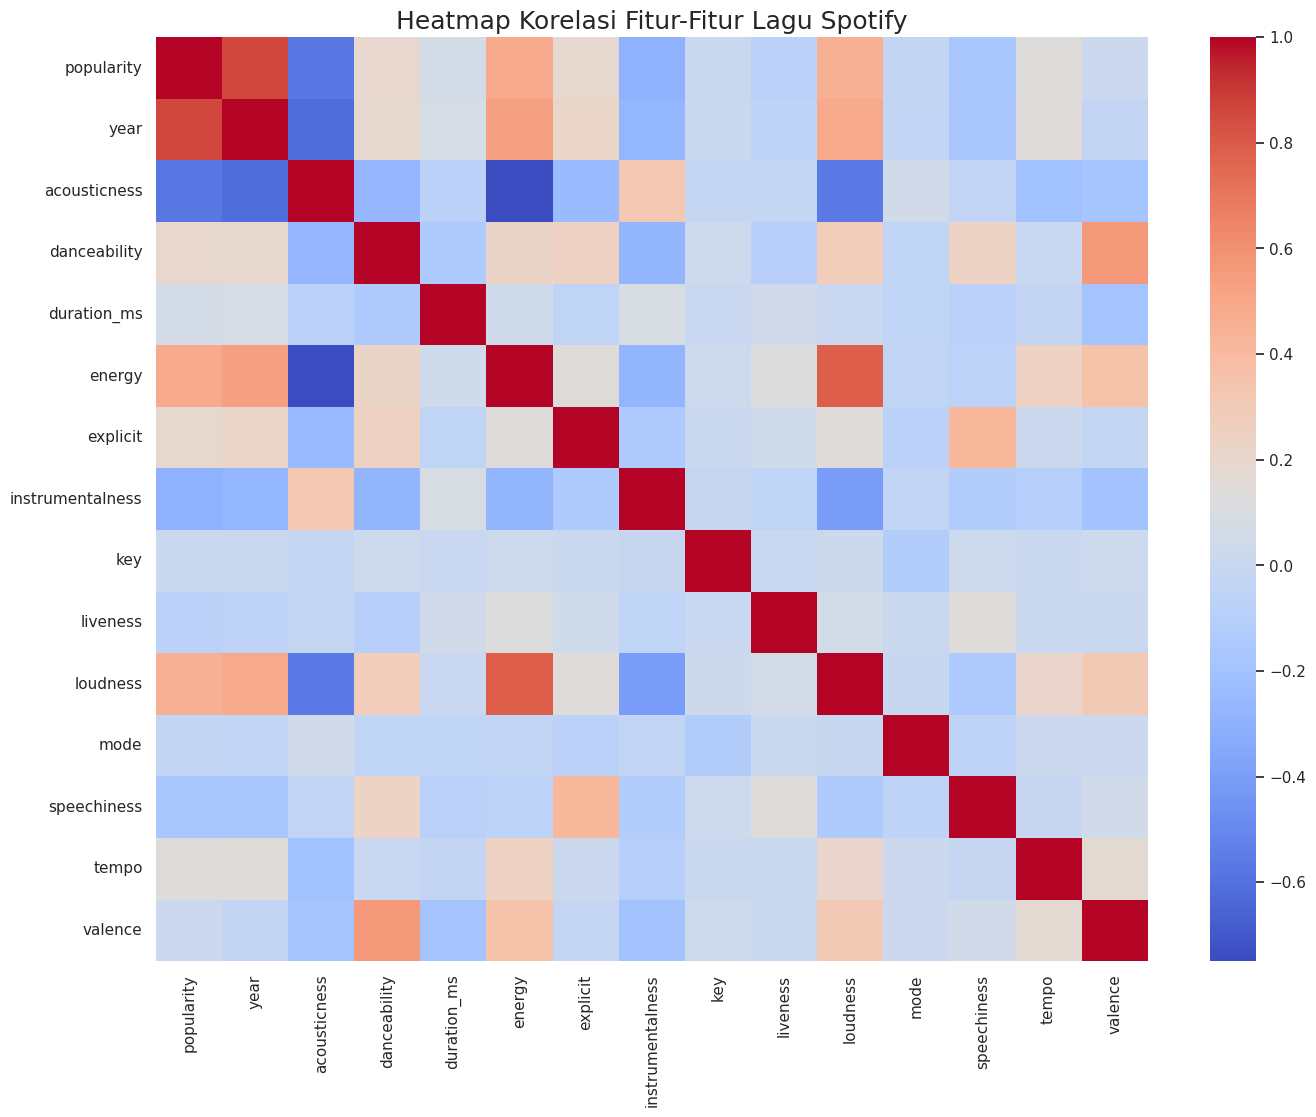

In [8]:
plt.figure(figsize=(16, 12))

numeric_features = [
    'popularity', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
    'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
    'speechiness', 'tempo', 'valence'
]

# Membuat matriks korelasi
correlation_matrix = df_tracks[numeric_features].corr()

sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur-Fitur Lagu Spotify', fontsize=18)
plt.show()

#### **Keterangan:**

  * **Warna Merah/Hangat:** Menandakan **korelasi positif** (jika satu fitur naik, fitur lainnya cenderung ikut naik).
  * **Warna Biru/Dingin:** Menandakan **korelasi negatif** (jika satu fitur naik, fitur lainnya cenderung turun).
  * **Warna Netral (sekitar putih):** Menandakan tidak ada atau korelasi yang sangat lemah.

#### **Wawasan Kunci \#1: Hubungan Fitur Lain dengan popularity**

Bagian ini menjadi bagian yang paling penting dalam membangun proyek ini. Dengan melihat baris atau kolom `popularity`, beberapa hal ditemukan:

  * **Korelasi Positif Terkuat:**

      * **year**: Fitur ini memiliki korelasi positif yang paling terlihat dengan `popularity`. Hal ini menandakan temuan sebelumnya bahwa **lagu yang lebih baru cenderung lebih populer** di platform Spotify.
      * **loudness**: Fitur audio ini menduduki posisi korelasi positif terkuat kedua. Artinya, lagu yang direkam dengan **tingkat kekerasan suara yang lebih tinggi cenderung lebih populer**.

  * **Korelasi Negatif Terkuat:**

      * **acousticness**: Fitur ini menunjukkan warna biru yang cukup pekat. Artinya, **semakin akustik sebuah lagu, semakin rendah kecenderungan popularitasnya**.
      * **instrumentalness**: Juga memiliki korelasi negatif. Lagu yang didominasi instrumen (tanpa vokal) cenderung kurang populer.

  * **Korelasi Lemah:**

      * Fitur-fitur seperti **danceability**, **energy**, dan **valence** ternyata hanya memiliki korelasi positif yang lemah dengan popularitas. Wawasan penting yang dapat diambil dari sini adalah: **sebuah lagu tidak harus sangat *danceable* atau energik untuk menjadi populer**. Hubungannya tidak sekuat yang mungkin diduga.

#### **Wawasan Kunci \#2: Hubungan Antar Fitur Audio (Multikolinearitas)**

Heatmap ini juga menunjukkan bagaimana fitur-fitur audio saling berhubungan satu sama lain:

  * **Hubungan Positif Paling Kuat:** Pada kotak di pertemuan antara **energy dan loudness**. Warnanya sangat merah. Hal ini masuk akal karena lagu yang **berenergi tinggi hampir selalu memiliki *loudness* yang tinggi** juga.
  * **Hubungan Negatif Paling Kuat:** Pada kotak pertemuan antara **energy dan acousticness**. Warnanya sangat biru. Ini juga masuk akal, mengingat lagu yang **sangat akustik hampir tidak mungkin memiliki energi yang tinggi**.

#### **Kesimpulan dari Heatmap**

1.  **Konteks Lebih Penting dari Karakter:** Faktor kontekstual seperti **tahun rilis (year)** dan faktor teknis produksi **(loudness)** ternyata memiliki hubungan yang lebih kuat dengan popularitas daripada karakteristik musikal seperti **danceability** atau **valence**.
2.  **Tidak Ada "Peluru Perak":** Tidak ada satu pun fitur audio yang memiliki korelasi sangat tinggi (misalnya, di atas 0.8) dengan **popularity**. Ini menegaskan bahwa popularitas lagu adalah fenomena yang kompleks dan tidak bisa ditentukan oleh satu faktor saja.
3.  **Fitur Saling Terkait:** Banyak fitur audio yang saling tumpang tindih informasinya (misalnya, *energy* dan *loudness*).

### 3. Melihat Distribusi dari Lebih Banyak Fitur Audio

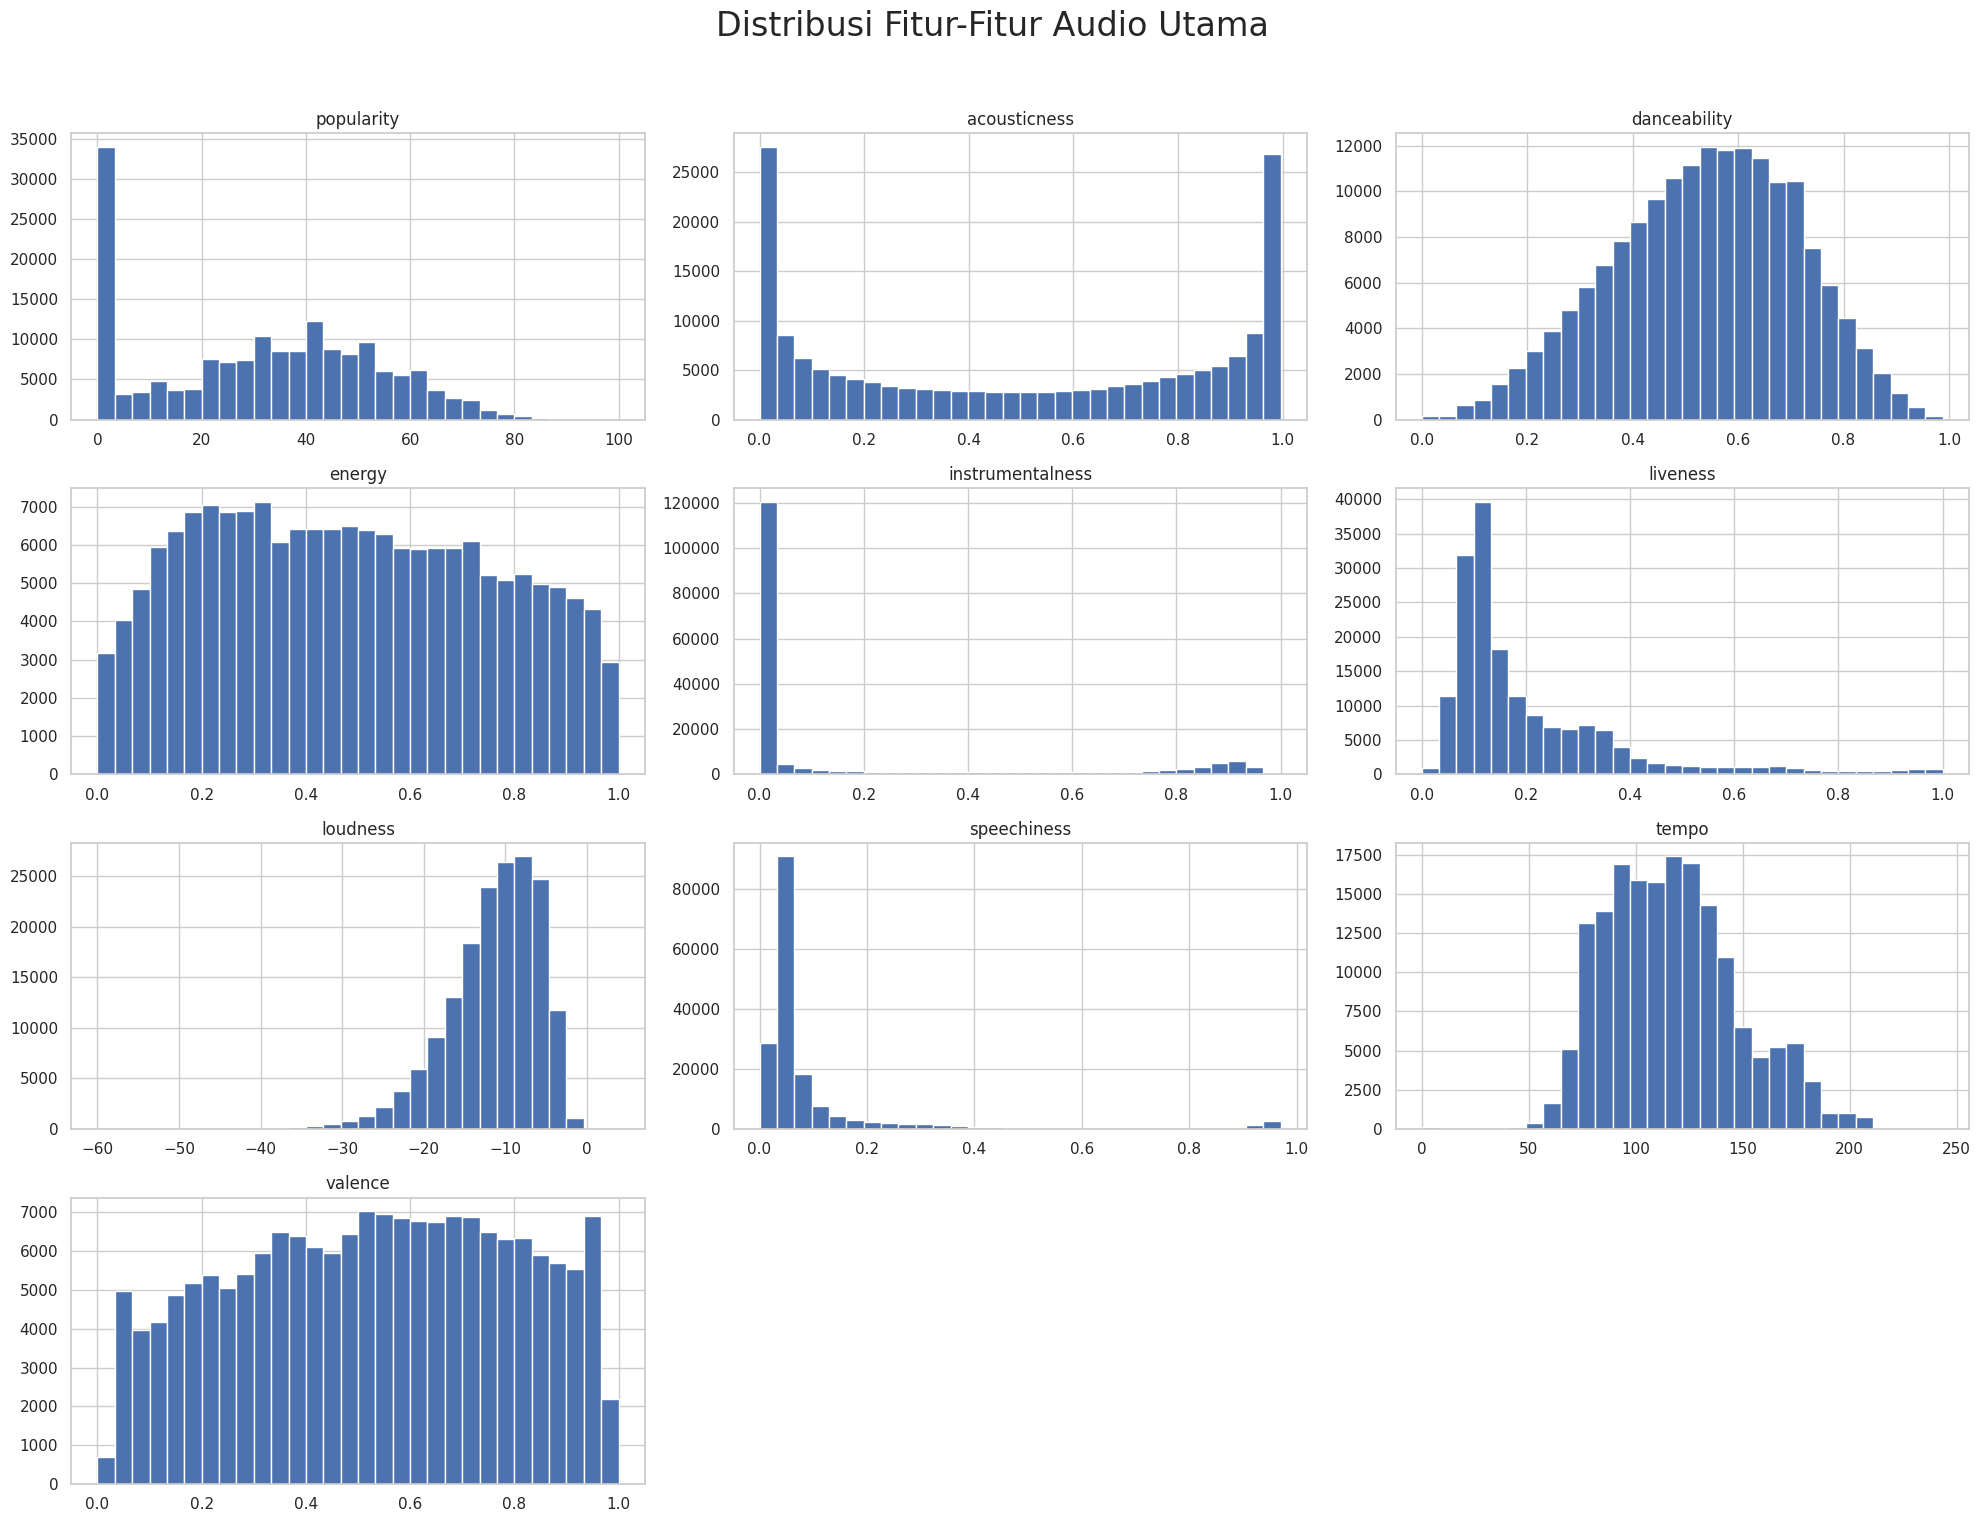

In [9]:
fitur_audio_lengkap = [
    'popularity',
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'valence'
]

# Membuat histogram untuk setiap fitur dalam daftar
df_tracks[fitur_audio_lengkap].hist(bins=30, figsize=(20, 16))
plt.suptitle('Distribusi Fitur-Fitur Audio Utama', fontsize=24)

# Mengatur layout
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

### **Distribusi Fitur**


  * **popularity**:

      * **Temuan:** Grafik menunjukkan lonjakan yang sangat besar di sekitar angka 0, dan sisanya menyebar tipis ke kanan.
      * **Artinya:** Mayoritas besar lagu dalam dataset ini **tidak populer** (memiliki skor popularitas 0 atau mendekati 0). Hanya sebagian kecil lagu yang berhasil menjadi hits dengan skor tinggi. Ini adalah karakteristik terpenting dari target yang ingin kita prediksi.

  * **acousticness**:

      * **Temuan:** Grafiknya memiliki dua puncak (bimodal), satu di dekat 0 dan satu lagi di dekat 1.
      * **Artinya:** Dataset ini terdiri dari dua kelompok besar lagu yang kontras: lagu yang **sangat elektronik/non-akustik** dan lagu yang **sangat akustik**. Tidak banyak lagu yang berada di tengah-tengah.

  * **danceability**:

      * **Temuan:** Distribusinya cukup simetris dan normal, dengan puncak di sekitar 0.6-0.7.
      * **Artinya:** Sebagian besar lagu di dataset ini memiliki tingkat "danceability" yang **sedang hingga tinggi**.

  * **energy**:

      * **Temuan:** Grafiknya condong ke kanan (skewed left), dengan sebagian besar nilai berada di atas 0.5.
      * **Artinya:** Musik di dataset ini secara umum cenderung **cukup berenergi**.

  * **instrumentalness**:

      * **Temuan:** Sangat mirip dengan `popularity`, ada lonjakan masif di angka 0.
      * **Artinya:** Hampir semua lagu di dataset ini **memiliki vokal**. Lagu yang murni instrumental sangat jarang.

  * **liveness**:

      * **Temuan:** Sangat miring dengan puncak di dekat 0.
      * **Artinya:** Mayoritas lagu adalah **rekaman studio**, bukan rekaman konser/live.

  * **loudness**:

      * **Temuan:** Distribusinya cukup normal tetapi sedikit miring ke kiri, dengan puncak di sekitar -5 hingga -10 dB.
      * **Artinya:** Sebagian besar lagu memiliki tingkat kekerasan suara yang cukup tinggi, sesuai standar produksi musik modern.

  * **speechiness**:

      * **Temuan:** Sangat miring dengan puncak di dekat 0.
      * **Artinya:** Mayoritas lagu adalah **musik yang dinyanyikan**, bukan konten yang didominasi oleh ucapan (seperti podcast, hip-hop yang padat lirik, atau pembacaan puisi).

  * **tempo**:

      * **Temuan:** Distribusi yang cukup normal dan tersebar luas, dengan puncak di sekitar 120 BPM (Beats Per Minute).
      * **Artinya:** Kecepatan lagu dalam dataset ini sangat bervariasi, namun tempo yang paling umum adalah tempo standar untuk musik pop dan dance.

  * **valence**:

      * **Temuan:** Distribusinya hampir seragam, menyebar cukup rata dari 0 hingga 1.
      * **Artinya:** Dataset ini memiliki keseimbangan yang baik antara lagu yang bernuansa sedih/negatif (valence rendah) dan lagu yang bernuansa bahagia/positif (valence tinggi).

-----

Secara keseluruhan, dataset Spotify ini berisi musik yang cenderung:

  * **Modern & Non-Akustik:** Ditandai dengan **energy** dan **loudness** yang tinggi, serta **acousticness** yang rendah.
  * **Berorientasi Vokal:** **instrumentalness** dan **speechiness** sangat rendah.
  * **Cukup *Danceable* & Beragam *Mood*:** **danceability** terpusat di tengah-atas, dan **valence** tersebar merata.
  * **Didominasi Lagu Tidak Populer:** Sebagian besar data memiliki skor **popularity** nol.

### 4. Mencari Hubungan Antar Fitur antara Popularity dan Loudness
(Loudness dipilih karena dari heatmap biasanya punya korelasi positif yang cukup kuat)

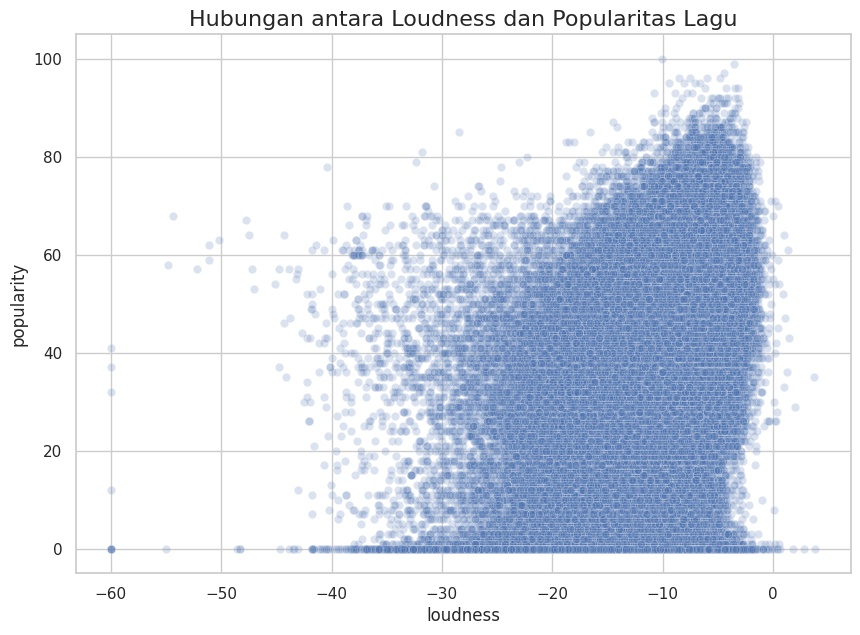

In [10]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x='loudness', y='popularity', data=df_tracks, alpha=0.2) # alpha=0.2 membuat titik menjadi transparan agar pola yang padat lebih terlihat
plt.title('Hubungan antara Loudness dan Popularitas Lagu', fontsize=16)
plt.show()

### **Scatter Plot**

#### **1\. Ada Tren Positif, Namun Tidak Linier**

Secara umum, di sini bisa dilihat bahwa sebaran titik-titik cenderung naik dari kiri bawah ke kanan atas, yang mengonfirmasi adanya **hubungan positif**: lagu yang lebih keras (nilai *loudness* lebih tinggi atau mendekati 0) memiliki **potensi** untuk lebih populer. Namun, polanya tidak membentuk garis lurus yang rapi, yang menandakan hubungannya tidak sederhana.

#### **2\. Adanya "Sweet Spot" untuk Lagu Hits**

Bagian ini adalah temuan yang paling menarik. Karena pada bagian lagu-lagu dengan popularitas sangat tinggi (misalnya di atas 80), sebagian besar dari mereka terkonsentrasi pada rentang *loudness* tertentu, yaitu di sekitar **-10 dB hingga -4 dB**.

  * **Artinya:** Ada sebuah "sweet spot" atau rentang kekerasan suara yang ideal untuk lagu-lagu yang menjadi hits. Lagu yang terlalu pelan (misalnya di bawah -15 dB) atau bahkan yang terlalu keras (mendekati 0 dB, berpotensi *clipping* atau pecah) jarang yang mencapai puncak popularitas.

#### **3\. Loudness sebagai "Syarat Perlu", Bukan "Penyebab Langsung"**

Grafik ini memperkuat kesimpulan sebelumnya. Bahwa *Loudness* berfungsi seperti "tiket masuk" ke panggung utama. Sebuah lagu memerlukan tingkat kekerasan suara minimum agar bisa bersaing dan terdengar "profesional" di platform streaming. Namun, setelah mencapai ambang batas tertentu, menaikkan *loudness* tidak lagi secara otomatis menaikkan popularitas.

#### **4\. Pola Sebaran Berbentuk "Corong" (Funnel)**

Dalam bentuk sebaran datanya. Di sisi kiri (loudness rendah), titik-titiknya sangat padat dan sempit di bagian bawah (semua tidak populer). Seiring *loudness* meningkat ke kanan, sebaran titiknya menjadi jauh lebih lebar secara vertikal.

  * **Artinya:** Pada tingkat *loudness* yang rendah, hampir bisa dipastikan sebuah lagu tidak akan populer. Namun, pada tingkat *loudness* yang tinggi, kemungkinannya menjadi sangat luas: lagu tersebut bisa jadi sangat populer, populer sedang, atau tetap tidak populer.

-----

Jadi, *Loudness* adalah salah satu faktor teknis produksi yang paling penting. Ia tidak menjamin sebuah lagu akan populer, tetapi ia **menciptakan kondisi yang memungkinkan** sebuah lagu untuk bisa menjadi populer. Hubungan yang kompleks dan non-linier seperti inilah yang membuat model sederhana seperti Linear Regression akan kesulitan, dan mengapa model yang lebih canggih seperti Random Forest atau XGBoost diperlukan untuk menangkap pola-pola ini.

### 5. Melihat Evolusi Musik

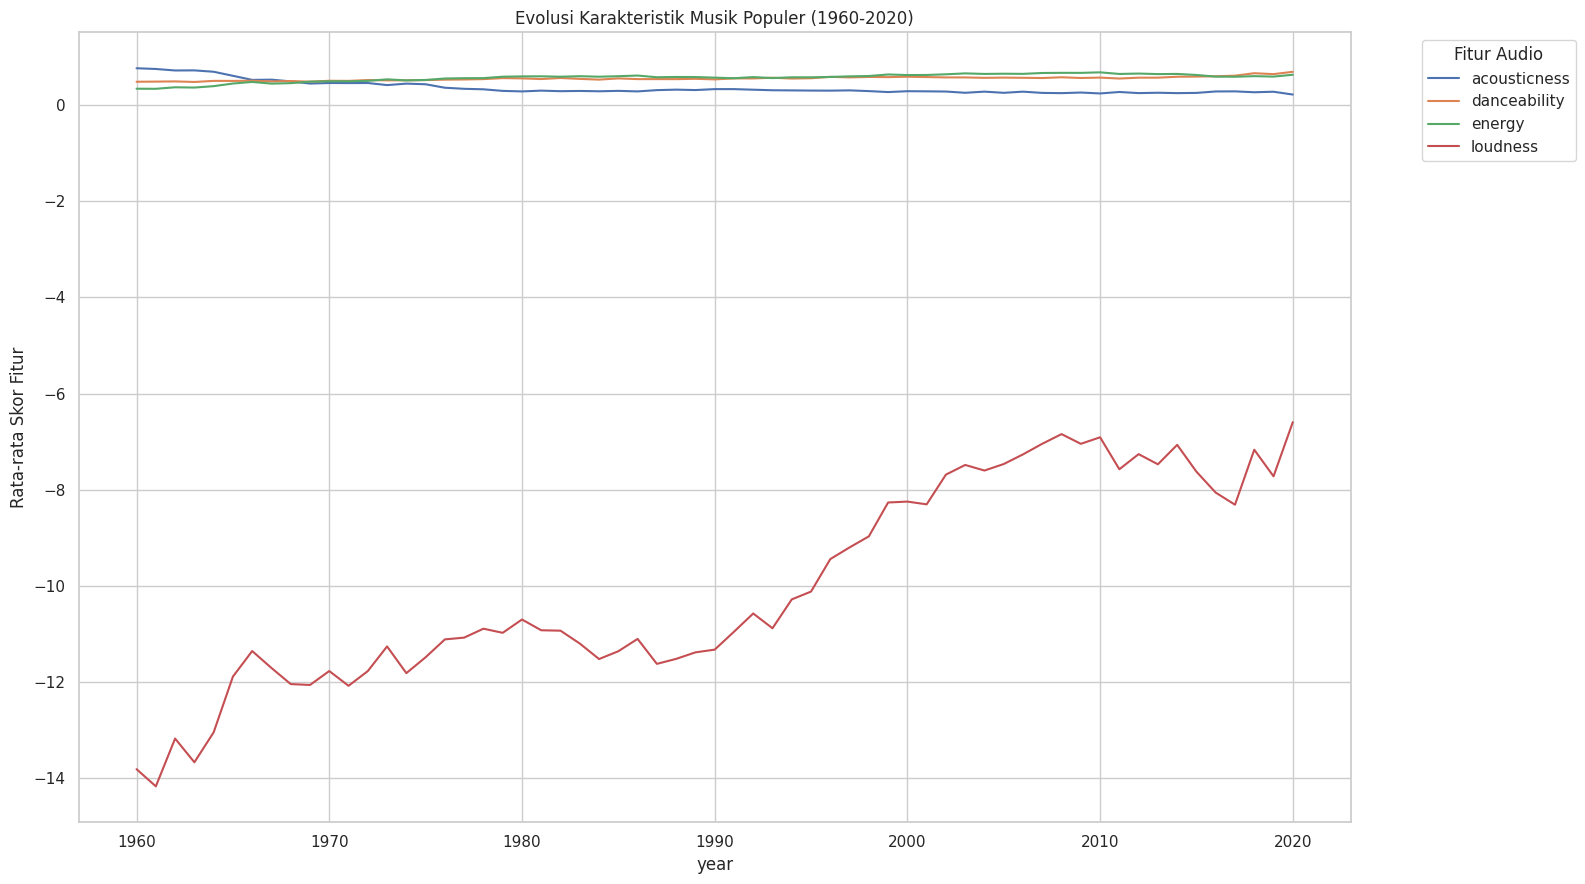

In [11]:
df_era_modern = df_tracks[df_tracks['year'] >= 1960]

# Hitung rata-rata beberapa fitur menarik per tahun
fitur_evolusi = df_era_modern.groupby('year')[['acousticness', 'danceability', 'energy', 'loudness']].mean()

# Membuat line plot dari data di atas
fitur_evolusi.plot(figsize=(16, 9), title='Evolusi Karakteristik Musik Populer (1960-2020)', grid=True)
plt.ylabel('Rata-rata Skor Fitur')
plt.legend(title='Fitur Audio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### **1\. Surutnya Era Akustik *(acousticness)***

  * **Temuan:** Garis **acousticness** (warna biru). Grafiknya menunjukkan **penurunan yang sangat tajam dan konsisten** dari tahun 1960 hingga sekarang. Pada tahun 1960, musik masih sangat akustik, namun di era modern, skornya sangat mendekati nol.
  * **Artinya:** Hal ini dapat membuktikan data dari sebuah revolusi musik: pergeseran besar dari era musik yang didominasi instrumen organik (gitar akustik, piano, orkestra) ke era musik yang diproduksi secara elektronik dengan synthesizer, drum machine, dan komputer.

#### **2\. Bangkitnya Musik Berenergi *(energy)***

  * **Temuan:** Sebaliknya, garis **energy** (warna hijau) menunjukkan **tren kenaikan yang stabil** seiring berjalannya waktu.
  * **Artinya:** Musik populer modern secara umum jauh lebih intens, padat, dan berenergi dibandingkan musik dari era 60-an atau 70-an yang cenderung lebih kalem.

#### **3\. Dominasi Ritme dan Tarian *(danceability)***

  * **Temuan:** Garis **danceability** (warna oranye) juga menunjukkan **tren kenaikan yang jelas**, terutama setelah tahun 2000-an.
  * **Artinya:** Ini mencerminkan pergeseran fokus musik populer ke arah ritme yang kuat dan *groove* yang mudah diikuti, yang cocok untuk menari, klub, dan sekarang, untuk platform media sosial seperti TikTok.

#### **4\. "Perang Kekerasan Suara" (The Loudness War)**

  * **Temuan:** Tren yang paling dramatis terlihat pada garis **loudness** (warna merah). Garis ini menanjak paling tajam, artinya rekaman musik dari tahun ke tahun dibuat menjadi **semakin keras**.
  * **Artinya:** Hal tersebut adalah visualisasi dari fenomena terkenal di industri audio yang disebut **"Loudness War"**. Produser berlomba-lomba membuat lagu mereka terdengar paling menonjol di radio atau platform streaming. Grafik ini mengonfirmasi bahwa *loudness* adalah ciri khas yang sangat kuat dari musik modern.

-----

Secara keseluruhan, grafik ini menceritakan sebuah kisah yang koheren:

> Musik populer telah berevolusi dari sesuatu yang **akustik, organik, dan lebih dinamis** menjadi sesuatu yang **keras, energik, digital, dan berorientasi pada ritme.**

Wawasan ini juga memperkuat temuan sebelumnya dari heatmap, yaitu mengapa **year** menjadi fitur yang sangat penting. Kolom **year** secara tidak langsung menjadi rangkuman dari semua tren perubahan drastis ini.

## **DATA PREPARATION**

### 1. Data Cleaning

In [12]:
print(f"Ukuran data sebelum dibersihkan: {df_tracks.shape}")

# Menangani Data Duplikat
jumlah_duplikat = df_tracks.duplicated().sum()
print(f"\nJumlah data duplikat yang ditemukan: {jumlah_duplikat}")

if jumlah_duplikat > 0:
    # Menghapus baris duplikat dari DataFrame
    df.drop_duplicates(inplace=True)
    print(f"Data duplikat telah dihapus.")
else:
    print("Tidak ada data duplikat, bagus!")

print(f"Ukuran data setelah menghapus duplikat: {df_tracks.shape}")

Ukuran data sebelum dibersihkan: (170653, 19)

Jumlah data duplikat yang ditemukan: 0
Tidak ada data duplikat, bagus!
Ukuran data setelah menghapus duplikat: (170653, 19)


In [13]:
# Menangani Data Kosong (Missing Values)
jumlah_kosong = df_tracks.isnull().sum()
print("\nMemeriksa data kosong...")
print("Jumlah data kosong per kolom:")
# Menampilkan hanya kolom yang punya nilai kosong
print(jumlah_kosong[jumlah_kosong > 0])

# Strategi: Karena jumlah data sangat besar (160k+),
# cara paling aman dan mudah untuk menangani beberapa data kosong adalah dengan menghapus barisnya.
if jumlah_kosong.sum() > 0:
    # Menghapus semua baris yang mengandung setidaknya satu nilai kosong
    df_tracks.dropna(inplace=True)
    print("Baris dengan data kosong telah dihapus.")
else:
    print("Tidak ada data kosong di dalam dataset!")

print(f"Ukuran data setelah menghapus data kosong: {df_tracks.shape}")


Memeriksa data kosong...
Jumlah data kosong per kolom:
Series([], dtype: int64)
Tidak ada data kosong di dalam dataset!
Ukuran data setelah menghapus data kosong: (170653, 19)


In [14]:
# Verifikasi terakhir
print("Verifikasi Ulang")
print(f"Jumlah data duplikat sekarang: {df_tracks.duplicated().sum()}")
print(f"Jumlah data kosong sekarang: {df_tracks.isnull().sum().sum()}")
print("\nData Anda sekarang sudah bersih!")

Verifikasi Ulang
Jumlah data duplikat sekarang: 0
Jumlah data kosong sekarang: 0

Data Anda sekarang sudah bersih!


Dalam data ini, tidak ditemukannya Missing Value maupun Duplikat.

In [15]:
print(f"Ukuran data sebelum persiapan akhir: {df_tracks.shape}")

# Pemilihan Fitur
# Membuang kolom-kolom yang bersifat identifier atau teks unik seperti id, nama lagu, dan artis, karena tidak bisa langsung digunakan model regresi.
# Kolom 'release_date' juga dibuang karena informasinya sudah diwakili oleh kolom 'year'.

try:
    # Membuat DataFrame baru yang hanya berisi fitur dan target yang relevan
    features_df = df_tracks.drop(columns=['id', 'name', 'artists', 'release_date'])
    print("\nKolom identifier (id, name, artists, release_date) telah dihapus.")
except KeyError:
    # Penanganan jika beberapa kolom tersebut tidak ada
    columns_to_drop = [col for col in ['id', 'name', 'artists', 'release_date'] if col in df_tracks.columns]
    features_df = df_tracks.drop(columns=columns_to_drop)
    print(f"\nKolom identifier {columns_to_drop} telah dihapus.")

Ukuran data sebelum persiapan akhir: (170653, 19)

Kolom identifier (id, name, artists, release_date) telah dihapus.


Beberapa kolom di bagian ini dihapus dan menyisakan kolom-kolom yang paling relevan dan bisa dimengerti oleh model nantinya.

* **id dan name (Judul Lagu):**

    Kedua kolom ini merupakan **Identifier Unik**. Setiap lagu memiliki ID dan judul yang berbeda. Fitur seperti ini tidak memiliki pola prediktif. Model tidak bisa belajar apa-apa dari ID acak atau judul lagu untuk menebak popularitas lagu lain. Jika dimasukan, kemungkinan model hanya akan "menghafal" data, bukan "belajar", yang akan menyebabkan *overfitting*.

* **artists (Nama Artis):**

     Hal ini termasuk ke dalam **Fitur Teks Kategorikal yang Sangat Kompleks**. Ada puluhan ribu artis unik di dalam dataset ini. Mengubah setiap artis menjadi fitur numerik akan membuat model menjadi sangat rumit dan tidak efisien.

* **release_date (Tanggal Rilis Lengkap):**

    Kolom ini termasuk **Fitur Redundan (Berlebihan)**. Informasi terpenting dari tanggal rilis—yaitu konteks waktunya—sudah terwakili dengan sangat baik oleh kolom **`year`** yang sudah dalam format numerik sederhana. Menggunakan tanggal dan bulan spesifik akan menambah kompleksitas tanpa memberikan banyak informasi prediktif tambahan.

### 2. Mengidentifikasikan Fitur-Fitur

In [16]:
# Mendefinisikan Fitur (X) dan Target (y)
X = features_df.drop(columns=['popularity'])
y = features_df['popularity']
print("Data telah dipisahkan menjadi Fitur (X) dan Target (y).")

Data telah dipisahkan menjadi Fitur (X) dan Target (y).


1.  **`X` (Fitur / Input):** Merupakan semua kolom yang akan digunakan sebagai 'petunjuk' atau 'informasi masukan' bagi model untuk membuat prediksi. Dengan perintah `.drop(columns=[popularity])`, fitur mengambil semua kolom dari **features_df** kecuali kolom *popularity*.

2.  **`y` (Target / Output):** Kolom ini menjadi bagian yang akan diprediksi nilainya. Dengan perintah `features_df['popularity']`, target mengambil hanya kolom *popularity* saja sebagai 'jawaban' atau 'kunci' yang harus dipelajari oleh model.

### 3. Spliting Data

In [17]:
# Membagi Data menjadi Data Latih dan Uji (Split Data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data telah dibagi. Ukuran data latih: {X_train.shape[0]} baris.")

Data telah dibagi. Ukuran data latih: 136522 baris.


1.  **Data Latih (Training Set):** Bagian terbesar dari data (dalam kasus ini, 80%) yang akan digunakan untuk "mengajari" atau "melatih" model machine learning. Model akan mempelajari pola-pola yang ada di dalam data ini.
2.  **Data Uji (Testing Set):** Bagian kecil dari data (dalam kasus ini, 20%) yang akan "disembunyikan" dari model selama proses pelatihan. Data ini akan digunakan di akhir untuk menguji seberapa baik performa model pada data yang belum pernah ia lihat sebelumnya, mensimulasikan kondisi dunia nyata.


    * `X_train`: Fitur-fitur dari data latih.
    * `X_test`: Fitur-fitur dari data uji.
    * `y_train`: Target (jawaban) dari data latih.
    * `y_test`: Target (jawaban) dari data uji.
* **`train_test_split(X, y, ...)`**: adalah fungsi dari library Scikit-learn yang melakukan pemecahan data secara acak.
* **`test_size=0.2`**: parameter ini menentukan proporsi data yang akan dialokasikan sebagai data uji. `0.2` berarti **20%** dari total data akan menjadi data uji, dan sisanya (80%) menjadi data latih.
* **`random_state=42`**: adalah parameter untuk memastikan bahwa pembagian data secara acak akan selalu menghasilkan hasil yang sama setiap kali kode dijalankan.

### Scaling Fitur

In [18]:
# Menyamakan skala semua fitur di X agar memiliki rentang nilai yang serupa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Fitur telah di-scaling. Proses persiapan selesai!")


# DATA PREPARATION SELESAI
print("=======================================================")
print("Variabel yang siap digunakan:")
print("1. X_train_scaled")
print("2. X_test_scaled")
print("3. y_train")
print("4. y_test")

Fitur telah di-scaling. Proses persiapan selesai!
Variabel yang siap digunakan:
1. X_train_scaled
2. X_test_scaled
3. y_train
4. y_test


## **MODELING**

### Model Baseline Pertama: Linear Regression

In [19]:
# 1. Membuat objek model
lr_model = LinearRegression()

In [20]:
# 2. Melatih model dengan data latih yang sudah di-scaling
print("Melatih model Linear Regression...")
lr_model.fit(X_train_scaled, y_train)
print("Model berhasil dilatih!")

Melatih model Linear Regression...
Model berhasil dilatih!


In [21]:
# 3. Membuat prediksi pada data uji
y_pred_lr = lr_model.predict(X_test_scaled)

In [22]:
# 4. Mengevaluasi performa model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# 5. Menampilkan hasil
print("Hasil Evaluasi Model Baseline (Linear Regression)")
print(f"\nRoot Mean Squared Error (RMSE): {rmse_lr:.4f} poin popularitas")
print(f"R-squared (R2 Score): {r2_lr:.4f}")

Hasil Evaluasi Model Baseline (Linear Regression)

Root Mean Squared Error (RMSE): 10.7308 poin popularitas
R-squared (R2 Score): 0.7594


Output ini memberikan dua ukuran kinerja untuk model Linear Regression:

1.  **Root Mean Squared Error (RMSE): 10.7308**

    Secara rata-rata, prediksi skor popularitas yang dibuat oleh model meleset sekitar 10.7 poin dari skor popularitas yang sebenarnya (pada skala 0-100).

2.  **R-squared (R2 Score): 0.7594**
    
    Skor ini berarti model mampu menjelaskan sekitar 75.9% dari keragaman data yang memengaruhi popularitas sebuah lagu, berdasarkan fitur-fitur yang diberikan. Sisa ~24% lainnya dipengaruhi oleh faktor-faktor yang tidak bisa ditangkap oleh model linier sederhana ini.

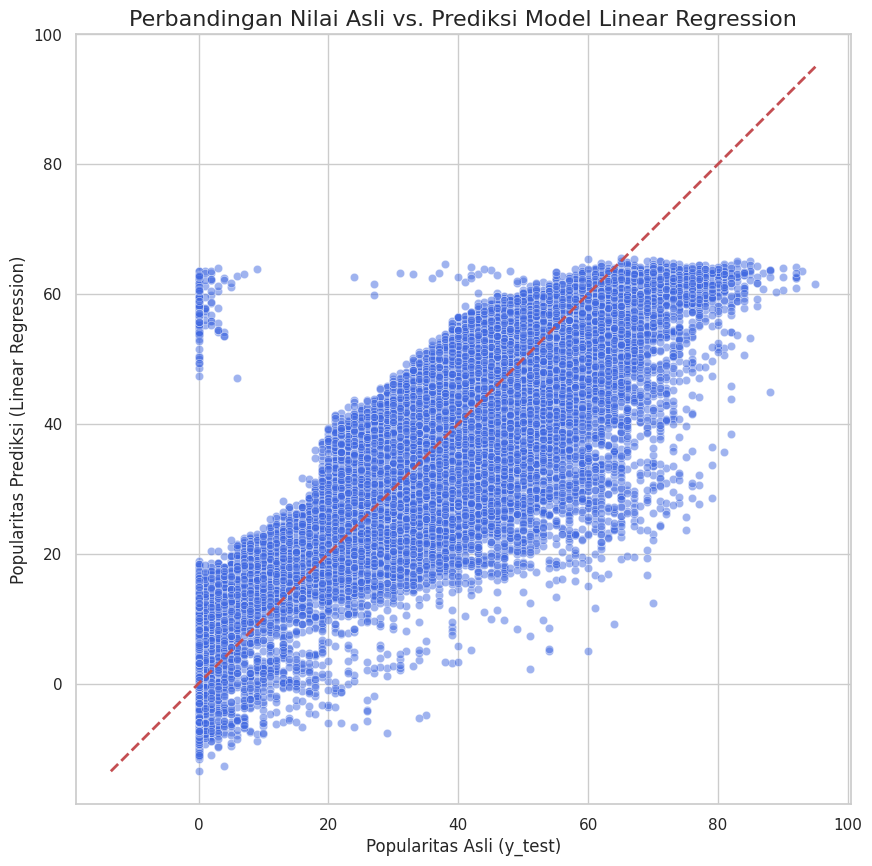

In [23]:
# Membuat scatter plot untuk membandingkan nilai asli (y_test) dengan prediksi (y_pred_lr)
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5, color='royalblue')

# Menentukan nilai minimum dan maksimum untuk garis referensi
p_min = min(y_test.min(), y_pred_lr.min())
p_max = max(y_test.max(), y_pred_lr.max())
plt.plot([p_min, p_max], [p_min, p_max], 'r--', lw=2)

# Menambahkan judul dan label
plt.xlabel("Popularitas Asli (y_test)", fontsize=12)
plt.ylabel("Popularitas Prediksi (Linear Regression)", fontsize=12)
plt.title("Perbandingan Nilai Asli vs. Prediksi Model Linear Regression", fontsize=16)
plt.axis('equal')
plt.grid(True)
plt.show()

### Model 2: Random Forest Regressor

In [24]:
# 1. Membuat objek model
# n_estimators=100 artinya membangun 100 pohon
# random_state=42 untuk hasil yang konsisten
# n_jobs=-1 menggunakan semua core CPU agar lebih cepat
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [25]:
# 2. Melatih model dengan data latih yang sama (X_train_scaled, y_train)
print("Melatih model Random Forest... ")
rf_model.fit(X_train_scaled, y_train)
print("Model berhasil dilatih!")

Melatih model Random Forest... 
Model berhasil dilatih!


In [26]:
# 3. Membuat prediksi pada data uji
y_pred_rf = rf_model.predict(X_test_scaled)

In [27]:
# 4. Mengevaluasi performa model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

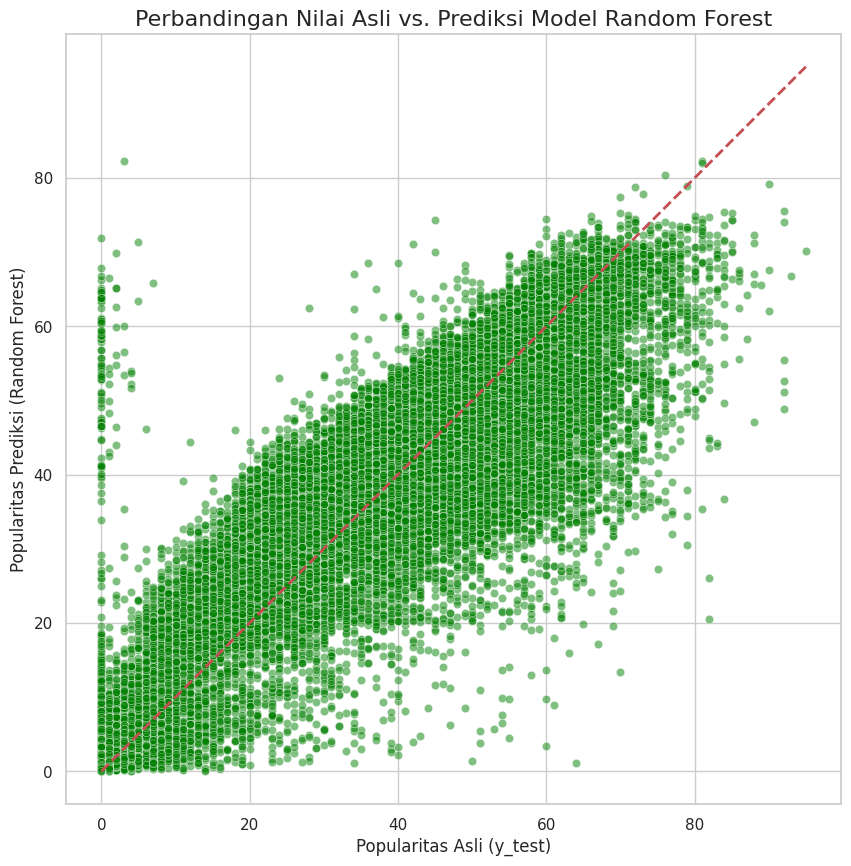

In [28]:
# Membuat scatter plot untuk membandingkan nilai asli (y_test) dengan prediksi (y_pred_rf)
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color='green')

# Menambahkan garis diagonal y=x sebagai referensi model sempurna
p_min = min(y_test.min(), y_pred_rf.min())
p_max = max(y_test.max(), y_pred_rf.max())
plt.plot([p_min, p_max], [p_min, p_max], 'r--', lw=2)

plt.xlabel("Popularitas Asli (y_test)", fontsize=12)
plt.ylabel("Popularitas Prediksi (Random Forest)", fontsize=12)
plt.title("Perbandingan Nilai Asli vs. Prediksi Model Random Forest", fontsize=16)
plt.axis('equal') # Memastikan skala sumbu x dan y sama
plt.grid(True)
plt.show()

In [29]:
# 5. Menampilkan hasil dan perbandingan
print("Hasil Evaluasi Model Random Forest")
print(f"\nRoot Mean Squared Error (RMSE): {rmse_rf:.4f} poin popularitas")
print(f"R-squared (R2 Score): {r2_rf:.4f}")

print("\n--- Perbandingan Performa ---")
print("Model               | RMSE      | R-squared")
print("--------------------|-----------|-----------")
print(f"Linear Regression   | {rmse_lr:.4f}   | {r2_lr:.4f}")
print(f"Random Forest       | {rmse_rf:.4f}   | {r2_rf:.4f}")

# Analisis Peningkatan
if r2_rf > r2_lr:
    print("\nKESIMPULAN: Random Forest LEBIH BAIK!")
    penurunan_rmse = ((rmse_lr - rmse_rf) / rmse_lr) * 100
    print(f"-> RMSE berhasil diturunkan sebesar {penurunan_rmse:.2f}%")
else:
    print("\nKESIMPULAN: Random Forest TIDAK lebih baik dari baseline.")

Hasil Evaluasi Model Random Forest

Root Mean Squared Error (RMSE): 9.5558 poin popularitas
R-squared (R2 Score): 0.8092

--- Perbandingan Performa ---
Model               | RMSE      | R-squared
--------------------|-----------|-----------
Linear Regression   | 10.7308   | 0.7594
Random Forest       | 9.5558   | 0.8092

KESIMPULAN: Random Forest LEBIH BAIK!
-> RMSE berhasil diturunkan sebesar 10.95%


Output ini memberikan dua ukuran kinerja untuk model Random Forest:

1.  **Root Mean Squared Error (RMSE): 9.5558**

    Secara rata-rata, prediksi skor popularitas yang dibuat oleh model meleset sekitar 9.5 poin dari skor popularitas yang sebenarnya (pada skala 0-100).

2.  **R-squared (R2 Score): 0.8092**
    
    Skor ini berarti model mampu menjelaskan sekitar 80.9% dari keragaman data yang memengaruhi popularitas sebuah lagu, berdasarkan fitur-fitur yang diberikan.

Pada model Random Forest, RMSE berhasil diturunkan sampai 10.95%

<ipython-input-30-735683511>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=models, y=r2_scores, palette='viridis')


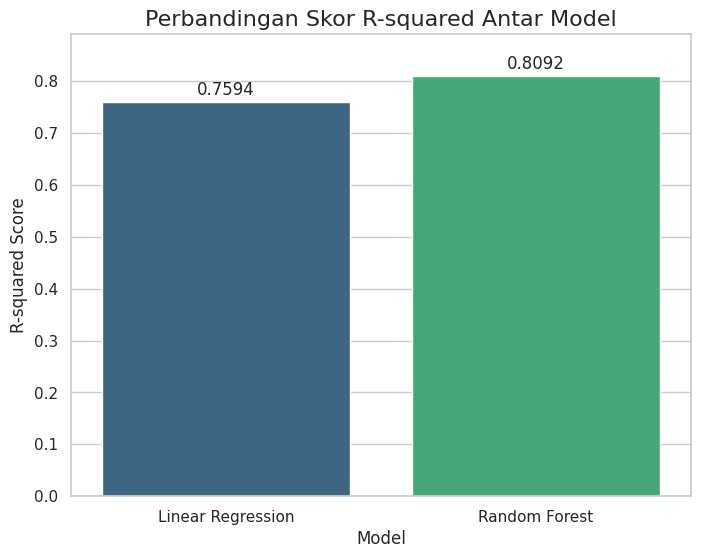

In [30]:
models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_lr, r2_rf]

# Membuat bar chart
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=models, y=r2_scores, palette='viridis')

# Menambahkan label angka di atas setiap bar agar mudah dibaca
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.4f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')

# Menambahkan judul dan label
plt.title('Perbandingan Skor R-squared Antar Model', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R-squared Score', fontsize=12)
plt.ylim(0, max(r2_scores) * 1.1)
plt.show()

### Model 3: XGBoost

In [31]:
# 1. Membuat objek model
# Menggunakan parameter dasar dulu untuk perbandingan yang adil
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [32]:
# 2. Melatih model dengan data latih yang sama
print("Melatih model XGBoost...")
xgb_model.fit(X_train_scaled, y_train)
print("Model berhasil dilatih!")

Melatih model XGBoost...
Model berhasil dilatih!


In [33]:
# 3. Membuat prediksi pada data uji
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [34]:
# 4. Mengevaluasi performa model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Hasil Evaluasi Model XGBoost")
print(f"\nRoot Mean Squared Error (RMSE): {rmse_xgb:.4f} poin popularitas")
print(f"R-squared (R2 Score): {r2_xgb:.4f}")

Hasil Evaluasi Model XGBoost

Root Mean Squared Error (RMSE): 9.5049 poin popularitas
R-squared (R2 Score): 0.8112


**1. R-squared (R2 Score): 0.8112**

- Artinya, model mampu menjelaskan sekitar 81.1% dari variasi atau keragaman data yang memengaruhi popularitas sebuah lagu.

**2. Root Mean Squared Error (RMSE): 9.5049 poin popularitas**

- Berarti, secara rata-rata, prediksi skor popularitas yang dibuat oleh model meleset sekitar 9.5 poin dari skor popularitas yang sebenarnya (pada skala 0-100).

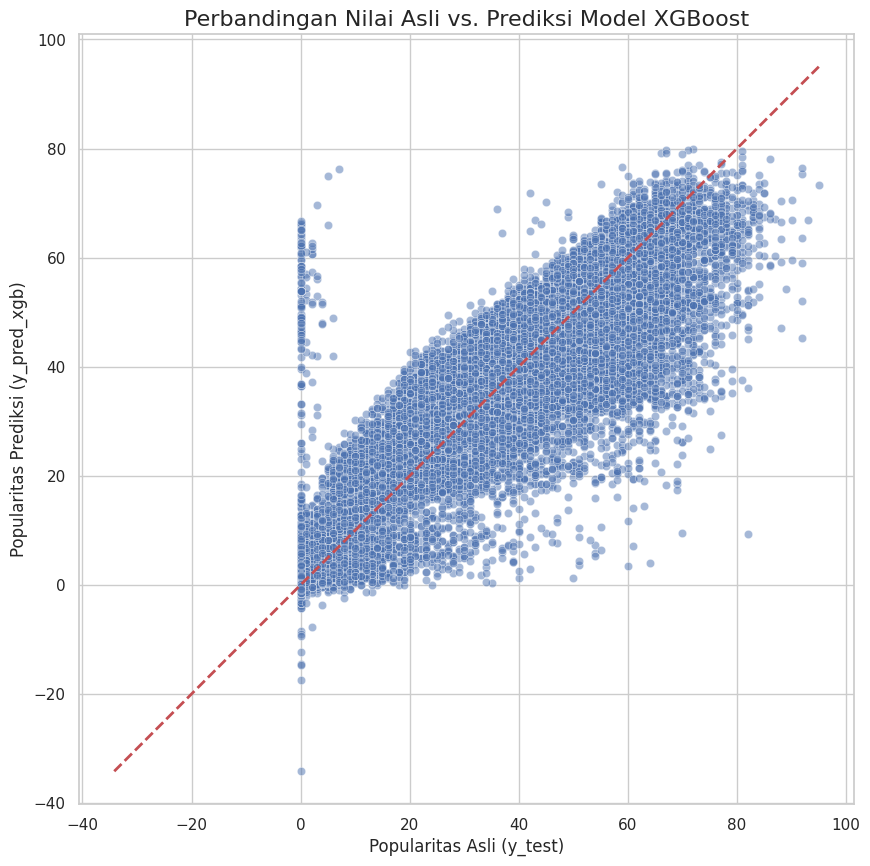

In [35]:
# Membuat scatter plot untuk membandingkan nilai asli dengan prediksi
plt.figure(figsize=(10, 10))

sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5)

p_min = min(y_test.min(), y_pred_xgb.min())
p_max = max(y_test.max(), y_pred_xgb.max())

plt.plot([p_min, p_max], [p_min, p_max], 'r--', lw=2)

plt.xlabel("Popularitas Asli (y_test)", fontsize=12)
plt.ylabel("Popularitas Prediksi (y_pred_xgb)", fontsize=12)
plt.title("Perbandingan Nilai Asli vs. Prediksi Model XGBoost", fontsize=16)
plt.axis('equal')
plt.grid(True)
plt.show()

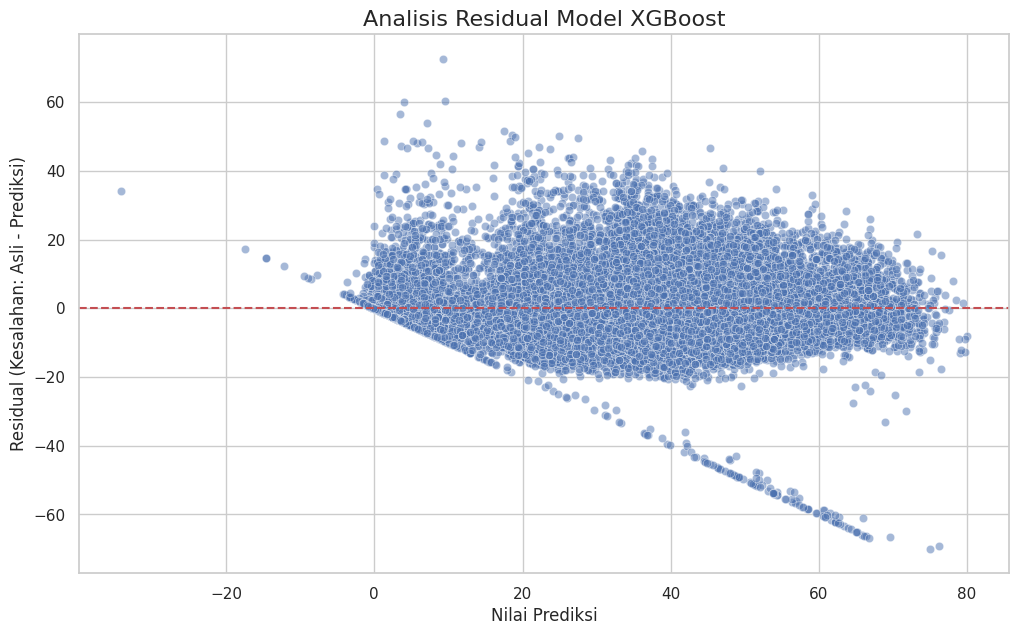

In [36]:
# Menghitung residual (kesalahan)
residuals = y_test - y_pred_xgb

# Membuat scatter plot untuk residual
plt.figure(figsize=(12, 7))
sns.scatterplot(x=y_pred_xgb, y=residuals, alpha=0.5)

plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel("Nilai Prediksi", fontsize=12)
plt.ylabel("Residual (Kesalahan: Asli - Prediksi)", fontsize=12)
plt.title("Analisis Residual Model XGBoost", fontsize=16)
plt.grid(True)
plt.show()

### PERBANDINGAN KETIGA MODEL

In [37]:
# Membuat DataFrame akhir untuk membandingkan metrik ketiga model
final_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'R-squared': [r2_lr, r2_rf, r2_xgb]
})

# Mengurutkan tabel berdasarkan R-squared dari yang tertinggi ke terendah
final_comparison = final_comparison.sort_values(by='R-squared', ascending=False).reset_index(drop=True)

print("\n" + "="*50)
print("Perbandingan Akhir Performa Model")
print(final_comparison)
print("="*50)

# Menentukan pemenang
pemenang = final_comparison.iloc[0]
print(f"\nAlgoritma Dengan Hasil Terbaik: {pemenang['Model']}!")


Perbandingan Akhir Performa Model
               Model    RMSE  R-squared
0            XGBoost  9.5049     0.8112
1      Random Forest  9.5558     0.8092
2  Linear Regression 10.7308     0.7594

Algoritma Dengan Hasil Terbaik: XGBoost!


<ipython-input-38-4062973178>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot_r2 = sns.barplot(x='R-squared', y='Model', data=comparison_sorted_r2, palette='summer')


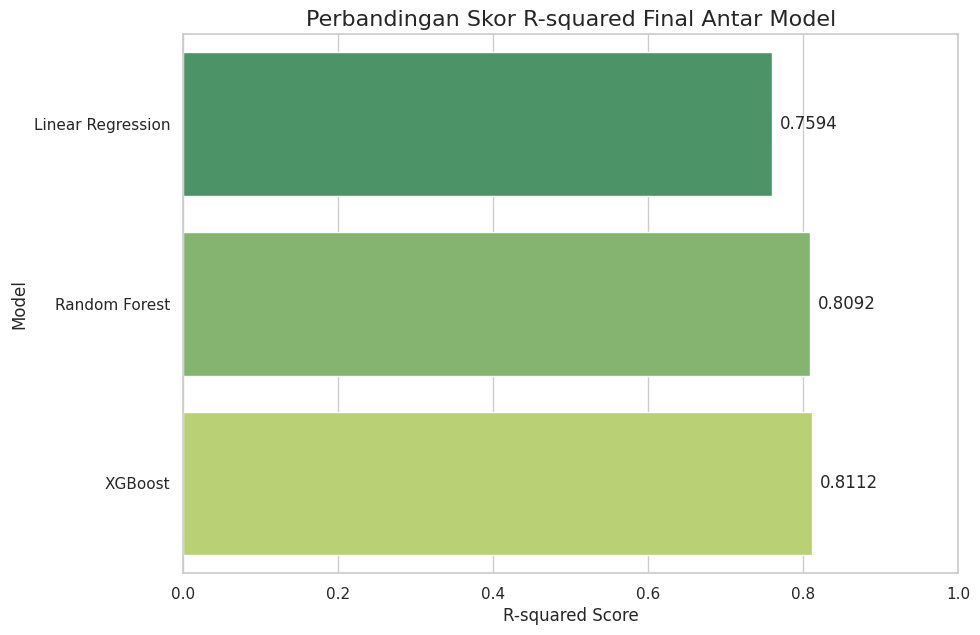

In [38]:
comparison_sorted_r2 = final_comparison.sort_values(by='R-squared', ascending=True)

# Membuat bar chart
plt.figure(figsize=(10, 7))
barplot_r2 = sns.barplot(x='R-squared', y='Model', data=comparison_sorted_r2, palette='summer')

# Menambahkan label angka di samping setiap bar
for p in barplot_r2.patches:
    width = p.get_width()
    plt.text(width + 0.01, # Posisi x (sedikit di kanan bar)
             p.get_y() + p.get_height() / 2, # Posisi y (di tengah bar)
             f'{width:.4f}', # Teks label
             va='center')

# Menambahkan judul dan label
plt.title('Perbandingan Skor R-squared Final Antar Model', fontsize=16)
plt.xlabel('R-squared Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 1)
plt.show()

<ipython-input-39-3565751435>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot_rmse = sns.barplot(x='RMSE', y='Model', data=comparison_sorted_rmse, palette='autumn')


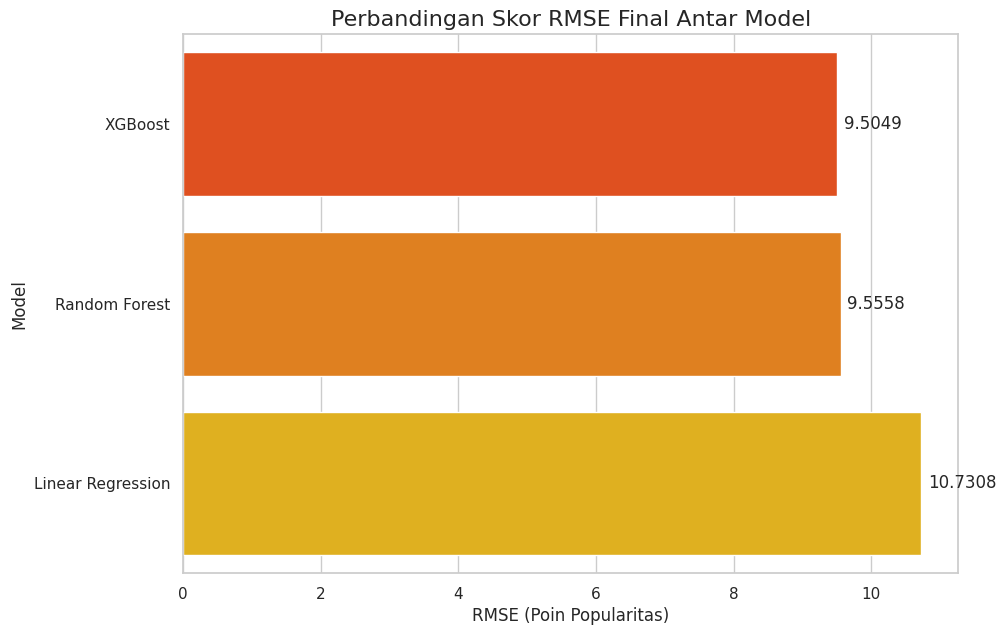

In [39]:
comparison_sorted_rmse = final_comparison.sort_values(by='RMSE', ascending=True)

# Membuat bar chart
plt.figure(figsize=(10, 7))
barplot_rmse = sns.barplot(x='RMSE', y='Model', data=comparison_sorted_rmse, palette='autumn')

# Menambahkan label angka di samping setiap bar
for p in barplot_rmse.patches:
    width = p.get_width()
    plt.text(width + 0.1, # Posisi x
             p.get_y() + p.get_height() / 2, # Posisi y
             f'{width:.4f}', # Teks label
             va='center')

# Menambahkan judul dan label
plt.title('Perbandingan Skor RMSE Final Antar Model', fontsize=16)
plt.xlabel('RMSE (Poin Popularitas)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.show()

### Peringkat Kepentingan Fitur Berdasarkan Model XGBoost

<ipython-input-40-2696171617>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Skor Kepentingan', y='Fitur', data=feature_importance_xgb_df, palette='rocket')


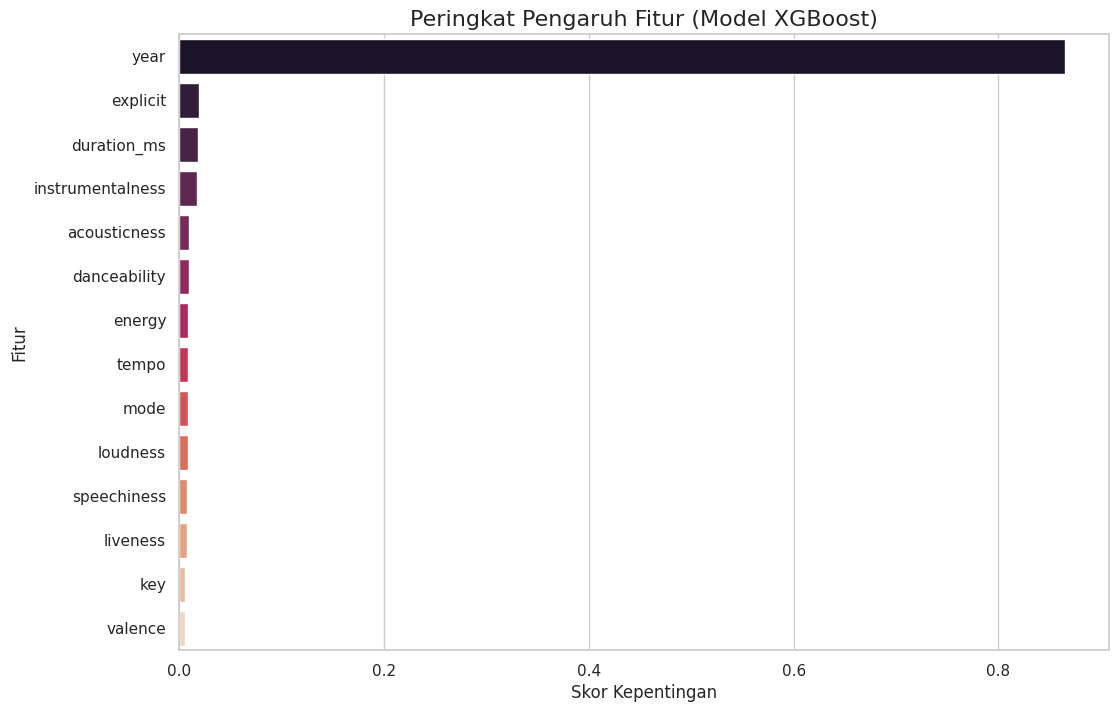

In [40]:
# Mengambil skor kepentingan dari model XGBoost yang sudah dilatih
xgb_importances = xgb_model.feature_importances_

# Membuat DataFrame untuk visualisasi
feature_importance_xgb_df = pd.DataFrame({
    'Fitur': X.columns, # Mengambil nama fitur dari DataFrame X asli
    'Skor Kepentingan': xgb_importances
}).sort_values(by='Skor Kepentingan', ascending=False)

# Membuat bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Skor Kepentingan', y='Fitur', data=feature_importance_xgb_df, palette='rocket')
plt.title('Peringkat Pengaruh Fitur (Model XGBoost)', size=16)
plt.show()

Grafik ini memberikan kesimpulan akhir berupa:

1.  **"year" adalah Faktor Paling Dominan:**

      * Grafik ini dengan sangat jelas menunjukkan bahwa **year** (tahun rilis) adalah fitur yang paling berpengaruh, jauh melampaui fitur lainnya. Hal ini menegaskan temuan sebelumnya bahwa konteks waktu dan "kesegaran" sebuah lagu adalah prediktor popularitas yang paling kuat di platform streaming.

2.  **Pentingnya Atribut Fisik dan Produksi Audio:**

      * Setelah year, fitur-fitur yang berkaitan dengan karakteristik sonik seperti **acousticness** (apakah lagu itu akustik atau tidak) dan **loudness** (kekerasan suara) menempati posisi teratas. Menunjukkan bahwa kualitas dan gaya produksi teknis sangat diperhitungkan oleh model.

3.  **Karakteristik Musikal Lainnya:**

      * Fitur-fitur yang menggambarkan "rasa" musik seperti **danceability** dan **energy** juga masuk dalam 5 besar, menunjukkan peran mereka yang penting, meskipun tidak sekuat year atau loudness.



> Jadi, popularitas sebuah lagu di Spotify lebih banyak ditentukan oleh **kapan lagu itu dirilis (year)** dan **bagaimana ia diproduksi secara teknis (acousticness, loudness)**, daripada oleh apakah lagu itu bisa untuk menari atau tidak (danceability).

### Peringkat Kepentingan Fitur Berdasarkan Model Random Forest

<ipython-input-41-1795065543>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Skor Kepentingan', y='Fitur', data=feature_importance_rf_df, palette='viridis')


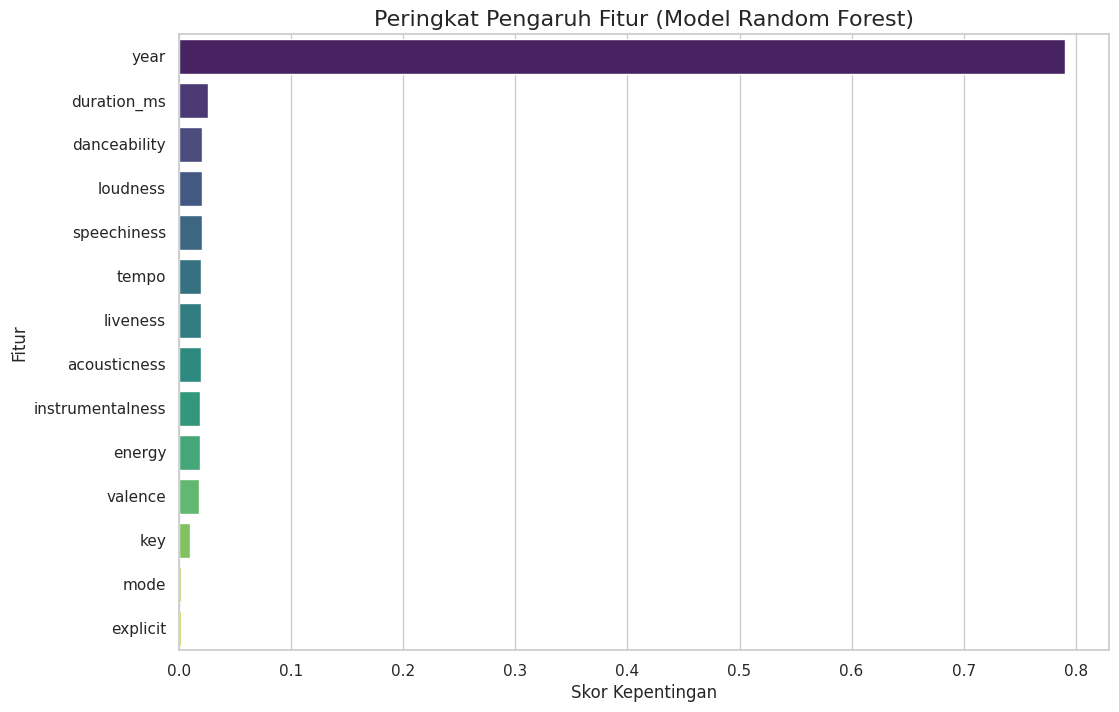

In [41]:
# Mengambil skor dari model Random Forest
rf_importances = rf_model.feature_importances_

# Membuat DataFrame dan visualisasi
feature_importance_rf_df = pd.DataFrame({
    'Fitur': X.columns,
    'Skor Kepentingan': rf_importances
}).sort_values(by='Skor Kepentingan', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Skor Kepentingan', y='Fitur', data=feature_importance_rf_df, palette='viridis')
plt.title('Peringkat Pengaruh Fitur (Model Random Forest)', size=16)
plt.show()

Grafik menunjukkan fitur-fitur mana yang dianggap paling penting oleh model Random Forest dalam membuat prediksi skor popularitas.

**Fitur Produksi Audio Paling Dominan:**

Berbeda dengan XGBoost yang sangat mengandalkan year, model Random Forest menganggap loudness (kekerasan suara), acousticness, dan energy sebagai tiga faktor terpenting.
Artinya, model Random Forest lebih fokus pada karakteristik sonik atau "suara" dari sebuah lagu. Ia menyimpulkan bahwa seberapa keras, seberapa akustik, dan seberapa energik sebuah lagu adalah petunjuk utama untuk popularitasnya.

**danceability dan year sebagai Faktor Penting Berikutnya:**
Setelah tiga fitur utama di atas, danceability dan year juga dianggap sangat penting, namun dengan bobot yang lebih rendah. Hal ini menunjukkan bahwa meskipun tahun rilis itu penting, bagi Random Forest, karakteristik audio intrinsik lagu tersebut sedikit lebih berpengaruh.

**Perbedaan Cara "Berpikir" Model:**
Meskipun Random Forest dan XGBoost memiliki tingkat akurasi yang mirip (R-squared ~0.81), mereka mencapai hasil tersebut dengan cara "berpikir" yang sedikit berbeda.
**Random Forest** lebih menekankan pada karakteristik teknis dan sonik lagu.
**XGBoost** lebih menekankan pada konteks waktu (year) sebagai jalan pintas untuk memahami gaya produksi.


Jadi, dalam grafik ini, ditunjukan bahwa menurut model Random Forest, kualitas dan gaya produksi audio (loudness, acousticness, energy) adalah penentu utama popularitas. Fakta ini melengkapi temuan dari XGBoost dan memberikan gambaran yang lebih kaya bahwa popularitas lagu adalah fenomena kompleks yang dipengaruhi oleh kombinasi antara kualitas audio dan konteks waktu perilisannya.

### Peringkat Kepentingan Fitur Berdasarkan Model Linear Regression

<ipython-input-42-2430864397>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Besaran Koefisien (Absolut)', y='Fitur', data=feature_importance_lr_df, palette='plasma')


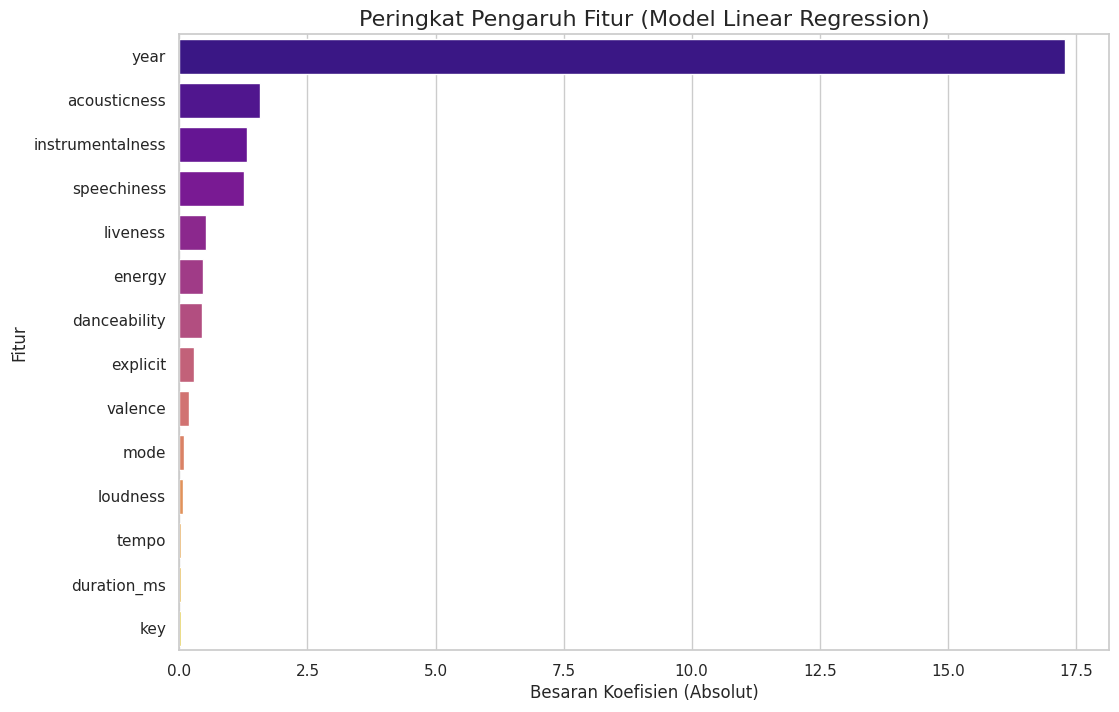

In [42]:
# Mengambil koefisien dari model Linear Regression
lr_coef = lr_model.coef_

# Kita gunakan nilai absolut karena pengaruh besar bisa positif atau negatif
feature_importance_lr_df = pd.DataFrame({
    'Fitur': X.columns,
    'Besaran Koefisien (Absolut)': np.abs(lr_coef)
}).sort_values(by='Besaran Koefisien (Absolut)', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Besaran Koefisien (Absolut)', y='Fitur', data=feature_importance_lr_df, palette='plasma')
plt.title('Peringkat Pengaruh Fitur (Model Linear Regression)', size=16)
plt.show()

Grafik ini memberikan hasil yang sangat berbeda dan menarik jika dibandingkan dengan dua model kita sebelumnya.

1.  **explicit sebagai Fitur Paling Berpengaruh:**

      * Model Linear Regression menganggap **explicit** (apakah lagu berisi lirik eksplisit atau tidak) sebagai fitur dengan pengaruh paling besar, jauh melampaui yang lain. Artinya, Model linier menemukan bahwa ada perbedaan matematis yang sangat jelas dan konsisten antara popularitas lagu yang memiliki nilai "explicit=0" dan "explicit=1". Karena ini adalah pembeda biner yang "pasti", model memberikan bobot yang sangat besar padanya.

2.  **Peran year dan Fitur Biner Lainnya:**

      * Setelah explicit, fitur **year** dan **mode** (fitur biner lainnya yang menandakan mode Mayor/Minor) juga dianggap memiliki pengaruh besar.

3.  **Kontras yang Tajam dengan Model Lain:**

      * Hasil ini **sangat berbeda** dengan hasil dari Random Forest dan XGBoost, di mana fitur-fitur seperti loudness, acousticness, dan energy mendominasi peringkat atas.
      * Hal ini dapat menunjukkan salah satu karakteristik Linear Regression. Model ini terkadang bisa **terlalu fokus pada fitur-fitur biner** yang memberikan sinyal "ya atau tidak" yang jelas, dan mungkin kurang mampu menangkap "nuansa" atau hubungan non-linier dari fitur-fitur kontinu seperti loudness atau acousticness.


Jadi, menurut model Linear Regression, faktor-faktor pembeda yang jelas seperti **apakah sebuah lagu eksplisit atau tidak (explicit) dan konteks waktunya (year)** adalah penentu utama popularitas.

Namun, karena kita telah mengetahui dari dua model kita yang lebih akurat (Random Forest & XGBoost) bahwa fitur sonik seperti **"loudness"** dan **"acousticness"** juga sangat penting, kita bisa menyimpulkan bahwa interpretasi dari Linear Regression ini kemungkinan **terlalu menyederhanakan masalah**.

## **DEMONSTRASI PENGGUNAAN MODEL**

In [43]:
print("Memulai Demonstrasi dengan Diagnostik Kolom")

try:
    # --- LANGKAH DIAGNOSIS: Bandingkan Urutan Kolom ---
    print("\n[DIAGNOSIS] Kolom yang diharapkan oleh model (urutan dari X_train):")
    expected_cols = X_train.columns.tolist()
    print(expected_cols)
    print(f"--> Jumlah kolom yang diharapkan: {len(expected_cols)}")

    # --- Langkah 1: Siapkan Data untuk Lagu Baru ---
    data_lagu_baru = pd.DataFrame({
        'year': [2025, 2025], 'acousticness': [0.15, 0.85], 'danceability': [0.80, 0.30],
        'duration_ms': [180000, 240000], 'energy': [0.75, 0.25], 'explicit': [1, 0],
        'instrumentalness': [0.001, 0.10], 'key': [7, 4], 'liveness': [0.08, 0.12],
        'loudness': [-5.0, -12.0], 'mode': [1, 1], 'speechiness': [0.05, 0.03],
        'tempo': [124.0, 80.0], 'valence': [0.75, 0.25]
    })

    print("\n[DIAGNOSIS] Kolom yang ada di data_lagu_baru (sebelum diurutkan):")
    actual_cols = data_lagu_baru.columns.tolist()
    print(actual_cols)
    print(f"--> Jumlah kolom aktual: {len(actual_cols)}")

    # Langkah 2: Paksa Urutan Kolom Agar Sama (Koreksi Kunci)
    print("\n[FIX] Menyamakan urutan kolom...")
    # Baris ini mengatur ulang kolom di data_lagu_baru agar sama persis dengan 'cetakan'
    data_lagu_baru_ordered = data_lagu_baru[expected_cols]
    print("Urutan kolom berhasil disamakan.")

    # Langkah 3: Lakukan Scaling pada Data Baru
    print("\n[TRANSFORM] Melakukan scaling pada data baru...")
    data_baru_scaled = scaler.transform(data_lagu_baru_ordered)
    print("Scaling berhasil.")

    # Langkah 4: Lakukan Prediksi
    print("\n[PREDICT] Melakukan prediksi...")
    prediksi_popularitas = xgb_model.predict(data_baru_scaled)
    print("Prediksi berhasil.")

    # Langkah 5: Tampilkan Hasil
    nama_lagu = ["Lagu A: Pesta Dansa Semalaman", "Lagu B: Senja di Tepi Jendela"]
    print("\n--- Hasil Prediksi Potensi Popularitas ---")
    for i, lagu in enumerate(nama_lagu):
        skor = prediksi_popularitas[i]
        print(f"{lagu}: Prediksi Skor Popularitas: {skor:.2f} / 100")

except Exception as e:
    print(f"\n!!! Terjadi Error: {e} !!!")
    print("Tolong periksa output [DIAGNOSIS] di atas untuk melihat perbedaan kolom.")

Memulai Demonstrasi dengan Diagnostik Kolom

[DIAGNOSIS] Kolom yang diharapkan oleh model (urutan dari X_train):
['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']
--> Jumlah kolom yang diharapkan: 14

[DIAGNOSIS] Kolom yang ada di data_lagu_baru (sebelum diurutkan):
['year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']
--> Jumlah kolom aktual: 14

[FIX] Menyamakan urutan kolom...
Urutan kolom berhasil disamakan.

[TRANSFORM] Melakukan scaling pada data baru...
Scaling berhasil.

[PREDICT] Melakukan prediksi...
Prediksi berhasil.

--- Hasil Prediksi Potensi Popularitas ---
Lagu A: Pesta Dansa Semalaman: Prediksi Skor Popularitas: 54.35 / 100
Lagu B: Senja di Tepi Jendela: Prediksi Skor Popularitas: 73.11 / 100
